In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.0


**Step 1:Important Libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Step 2:Load Datatsets**

In [3]:
dataset=pd.read_csv("Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

X


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [5]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

**Step 3:Feature Engineering**

In [6]:
grography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)


In [7]:
X = X.drop(columns=['Geography', 'Gender'])

In [8]:
X = pd.concat([X, grography, gender], axis=1)

**Step 4:Splitting the dataset into training and test sets**

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [10]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
9394,597,35,8,131101.04,1,1,1,192852.67,True,False,False
898,523,40,2,102967.41,1,1,0,128702.10,False,False,False
2398,706,42,8,95386.82,1,1,1,75732.25,False,True,False
5906,788,32,4,112079.58,1,0,0,89368.59,False,False,True
2343,706,38,5,163034.82,2,1,1,135662.17,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
1037,625,24,1,0.00,2,1,1,180969.55,False,False,False
2899,586,35,7,0.00,2,1,0,70760.69,False,False,False
9549,578,36,1,157267.95,2,1,0,141533.19,False,True,True
2740,650,34,4,142393.11,1,1,1,11276.48,True,False,True


**Step 5:Feature Scaling**

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()


In [12]:
# Fitting the scaler to the training data and transforming it
X_train = sc.fit_transform(X_train)

# Transforming the testing data
X_test = sc.transform(X_test)

In [13]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [15]:
from tensorflow.keras.optimizers import Adam


classifier = Sequential()


classifier.add(Dense(units=11, activation='relu'))  
classifier.add(Dense(units=7, activation='relu'))  
classifier.add(Dense(units=6, activation='relu'))  
classifier.add(Dense(1, activation='sigmoid'))     


opt = Adam(learning_rate=0.001)  
classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])


In [16]:
import tensorflow as tf

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',          
    min_delta=0.0001,           
    patience=20,             
    verbose=1,               
    mode='auto',                 
    baseline=None,               
    restore_best_weights=False
)


In [ ]:
model_history = classifier.fit(
    X_train,                    # Training features
    y_train,                    # Training labels
    validation_split=0.33,       # Split 33% of the training data for validation
    batch_size=10,               # Set batch size
    epochs=1000,                 # Maximum number of epochs
    callbacks=[early_stopping]   # Add early stopping (must be passed as a list)
)


Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7196 - loss: 0.5753 - val_accuracy: 0.7970 - val_loss: 0.4541
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7924 - loss: 0.4537 - val_accuracy: 0.8076 - val_loss: 0.4320
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8317 - loss: 0.4115 - val_accuracy: 0.8148 - val_loss: 0.4178
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8313 - loss: 0.3946 - val_accuracy: 0.8319 - val_loss: 0.3947
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8478 - loss: 0.3727 - val_accuracy: 0.8413 - val_loss: 0.3770
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8588 - loss: 0.3611 - val_accuracy: 0.8432 - val_loss: 0.3693
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8537 - loss: 0.3557 - val_accuracy: 0.8470 - val_loss: 0.3673
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8623 - loss: 0.3387 - 

In [85]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

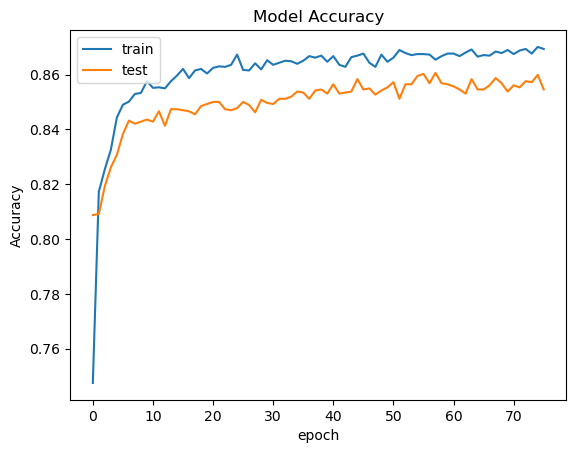

In [86]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [93]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)

y_pred



63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [88]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.855